In [12]:
import pandas as pd

# Load the uploaded file to understand its structure
file_path = 'Redacoes_comeco.xlsx'
data = pd.ExcelFile(file_path)

# Display sheet names to decide the relevant sheet for EDA
data.sheet_names


['Redacoes_comeco', 'Planilha1']

In [3]:
# Instalar o modelo do SpaCy para português
!python -m spacy download pt_core_news_sm
!python -m spacy download pt_core_news_lg
!pip install enelvo sentence_transformers
!pip install spacy-lookups-data


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 90.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [13]:
# Load the relevant sheet to explore its structure
df = data.parse('Redacoes_comeco')

# Display the first few rows of the data to understand its structure
df.head()


,Tema,Nota,Redação
0,[Enem 2017] Desafios para a formação educacion...,880,"Na obra ""utopia"" do escritor inglês Thomas Mor..."
1,[Enem 2017] Desafios para a formação educacion...,960,A Constituição Federal de 1988 assegura a todo...
2,[Enem 2017] Desafios para a formação educacion...,960,"Desde os tempos da Grécia Antiga, quando Sísif..."
3,[Enem 2017] Desafios para a formação educacion...,880,Os sentidos são fundamentais para a capacidade...
4,[Enem 2017] Desafios para a formação educacion...,880,"A Constituição Federal de 1988, documento jurí..."


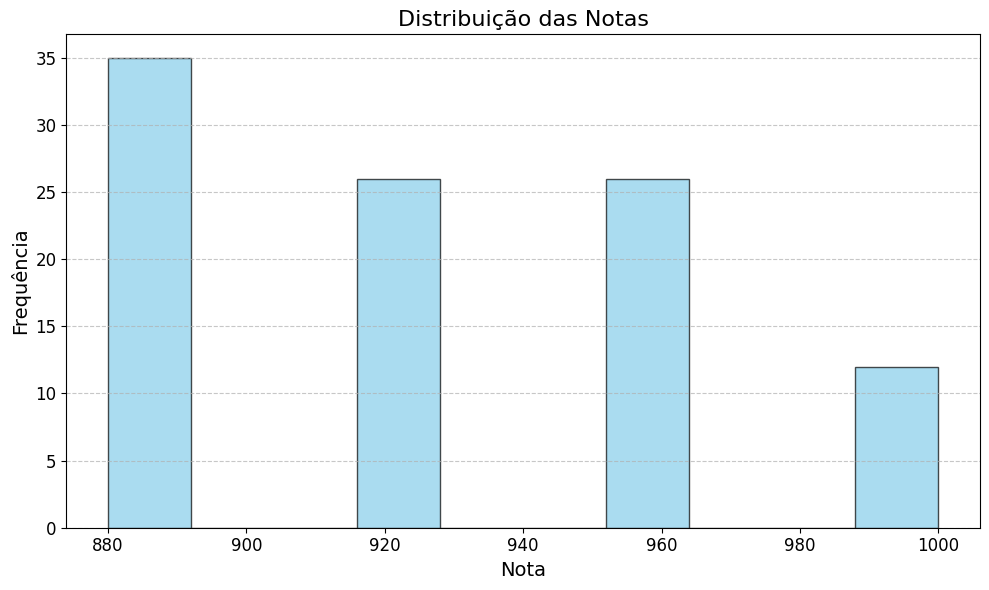

In [14]:
# Plotar a distribuição das notas
plt.figure(figsize=(10, 6))
plt.hist(df['Nota'], bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribuição das Notas', fontsize=16)
plt.xlabel('Nota', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


   Nota  Quantidade de Entidades  \
0   880                       10   
1   960                       18   
2   960                       13   
3   880                       10   
4   880                       10   

                                  Tipos de Entidades  
0  [PER, LOC, PER, LOC, PER, LOC, PER, LOC, LOC, ...  
1  [LOC, LOC, LOC, PER, LOC, LOC, LOC, LOC, LOC, ...  
2  [ORG, PER, PER, LOC, PER, LOC, LOC, LOC, ORG, ...  
3  [LOC, MISC, MISC, ORG, LOC, LOC, LOC, LOC, LOC...  
4  [LOC, MISC, LOC, PER, LOC, LOC, MISC, LOC, PER...  

Média de entidades por nota:
      Quantidade de Entidades
Nota                         
880                 11.800000
920                 10.000000
960                  8.500000
1000                11.083333


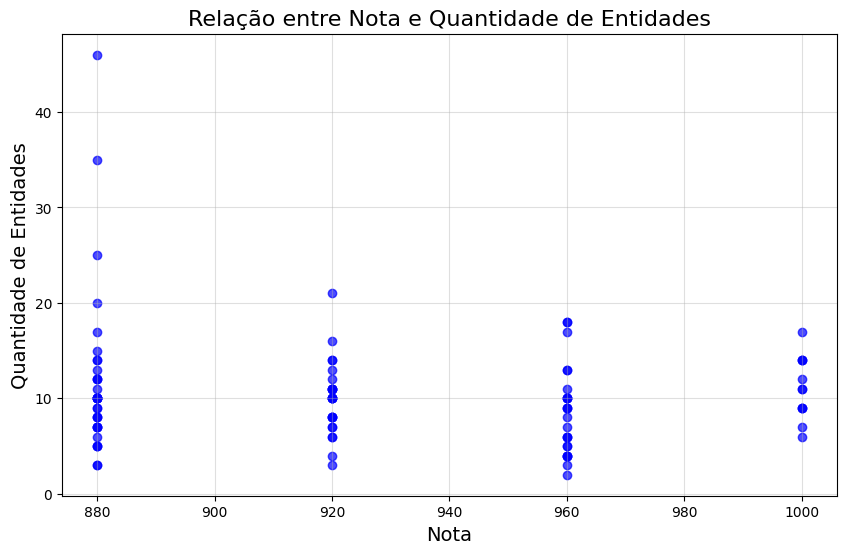

In [16]:
import pandas as pd
import spacy

# Carregar o modelo SpaCy em português
nlp = spacy.load("pt_core_news_sm")

# Carregar o arquivo Excel
file_path = 'Redacoes_comeco.xlsx'  # Substitua pelo caminho correto do arquivo
data = pd.ExcelFile(file_path)

# Carregar a planilha relevante
df = data.parse('Redacoes_comeco')

# Função para extrair entidades de uma redação
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Aplicar a extração de entidades em cada redação
df['Entidades'] = df['Redação'].apply(lambda x: extract_entities(x))

# Contar o número de entidades por redação
df['Quantidade de Entidades'] = df['Entidades'].apply(len)

# Separar os tipos de entidades
df['Tipos de Entidades'] = df['Entidades'].apply(lambda ents: [ent[1] for ent in ents])

# Analisar a relação entre quantidade de entidades e nota
relation = df[['Nota', 'Quantidade de Entidades']].groupby('Nota').mean()

# Exibir o DataFrame atualizado
print(df[['Nota', 'Quantidade de Entidades', 'Tipos de Entidades']].head())
print("\nMédia de entidades por nota:")
print(relation)

# Visualizar a relação entre nota e quantidade de entidades
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Nota'], df['Quantidade de Entidades'], alpha=0.7, color='blue')
plt.title('Relação entre Nota e Quantidade de Entidades', fontsize=16)
plt.xlabel('Nota', fontsize=14)
plt.ylabel('Quantidade de Entidades', fontsize=14)
plt.grid(alpha=0.4)
plt.show()


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


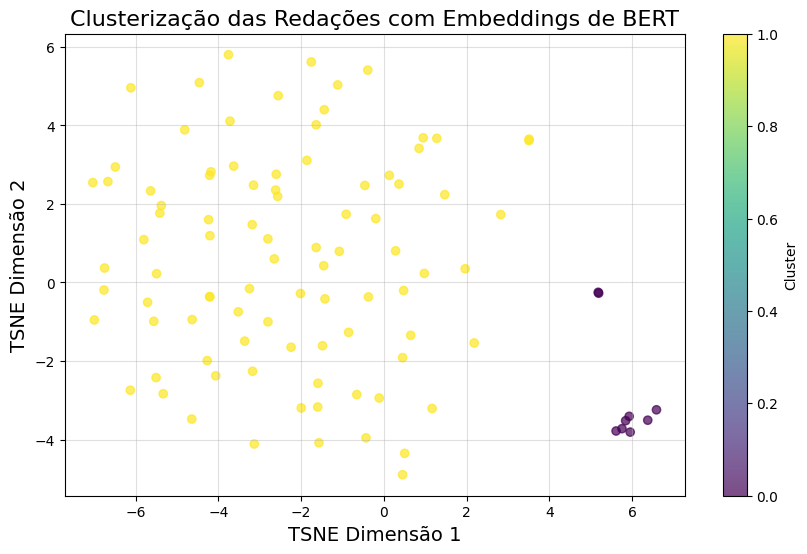

Palavras mais comuns no Cluster 0:
{'acidentes': 10, 'brasil': 18, 'brasileira': 9, 'controle': 13, 'dados': 24, 'informações': 8, 'internet': 13, 'lei': 19, 'manipulação': 8, 'população': 8, 'privacidade': 9, 'seca': 13, 'sociais': 11, 'social': 9, 'sociedade': 19, 'trabalho': 11, 'trânsito': 15, 'usuários': 11, 'vida': 8, 'álcool': 9}

Palavras mais comuns no Cluster 1:
{'brasil': 154, 'brasileira': 72, 'cenário': 59, 'educação': 141, 'federal': 65, 'governo': 95, 'medidas': 54, 'ministério': 59, 'país': 92, 'pessoas': 66, 'políticas': 72, 'população': 94, 'problema': 65, 'problemática': 55, 'público': 55, 'realidade': 56, 'sociais': 56, 'social': 122, 'sociedade': 175, 'surdos': 65}

Média de notas por cluster:
Cluster
0    928.888889
1    925.777778
Name: Nota, dtype: float64


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.feature_extraction.text import CountVectorizer
import torch
import numpy as np
from collections import Counter
import spacy

# Carregar modelo SpaCy para português
nlp = spacy.load("pt_core_news_sm")

# Carregar o arquivo Excel
file_path = 'Redacoes_comeco.xlsx'  # Substitua pelo caminho correto do arquivo
data = pd.ExcelFile(file_path)
df = data.parse('Redacoes_comeco')

# Função para remover stop words e preprocessar texto
def preprocess_text(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop and token.is_alpha])

df['Processed_Text'] = df['Redação'].apply(preprocess_text)

# Carregar modelo BERT para embeddings
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased")

# Função para gerar embeddings com BERT
def generate_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()
    return embeddings.numpy()

# Gerar embeddings para cada redação
df['Embedding'] = df['Processed_Text'].apply(generate_embeddings)

# Converter embeddings para matriz numpy
embedding_matrix = np.stack(df['Embedding'].values)

# Clusterização usando K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(embedding_matrix)

# Análise do conteúdo de cada cluster
def analyze_cluster(cluster_id):
    cluster_texts = df[df['Cluster'] == cluster_id]['Processed_Text']
    vectorizer = CountVectorizer(max_features=20)
    X = vectorizer.fit_transform(cluster_texts)
    word_counts = np.asarray(X.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()
    return dict(zip(words, word_counts))

cluster_0_analysis = analyze_cluster(0)
cluster_1_analysis = analyze_cluster(1)

# Redução de dimensionalidade para visualização (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(embedding_matrix)

# Adicionar as coordenadas reduzidas ao DataFrame
df['TSNE_1'] = reduced_embeddings[:, 0]
df['TSNE_2'] = reduced_embeddings[:, 1]

# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['TSNE_1'], df['TSNE_2'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clusterização das Redações com Embeddings de BERT', fontsize=16)
plt.xlabel('TSNE Dimensão 1', fontsize=14)
plt.ylabel('TSNE Dimensão 2', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

# Exibir palavras mais comuns por cluster
print("Palavras mais comuns no Cluster 0:")
print(cluster_0_analysis)

print("\nPalavras mais comuns no Cluster 1:")
print(cluster_1_analysis)

# Analisar o conteúdo dos clusters
cluster_analysis = df.groupby('Cluster')['Nota'].mean()
print("\nMédia de notas por cluster:")
print(cluster_analysis)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

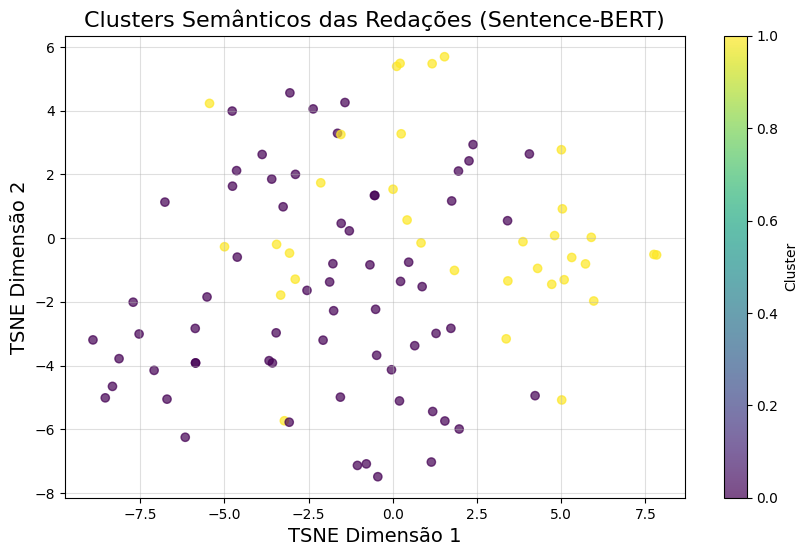


Média de notas por cluster:
Cluster
0    928.000000
1    922.352941
Name: Nota, dtype: float64

Redações mais similares semanticamente:
Redação 1:
Na obra intitulada "Brasil, o país do futuro", Stefan Zweig, autor austríaco, em sua visita ao Brasil defendeu a ideia de que o país estava destinado a ser um dos mais importantes do mundo no futuro. No entanto, 80 anos depois, as previsões do autor ainda não se concretizaram, pois o comportamento da sociedade vem sendo manipulado pelo controle de dados na internet. Tal cenário ocorre devido à ausência de pensamento crítico dos usuários e do ensino tradicionalista pertinente atualmente.   Primeiramente, o falho sistema de ensino no meio tecnológico contribui para a ocorrência deste problema. Isso evidencia-se com a permanência do ensino tradicional desde o final do século XIX. Como afirmado por José Pacheco, educador brasileiro, "Temos escolas do século XIX, professores do século XX e alunos do século XXI". Deste modo, a falta de ressignifi

In [19]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Carregar o arquivo Excel
file_path = 'Redacoes_comeco.xlsx'  # Substitua pelo caminho correto do arquivo
data = pd.ExcelFile(file_path)
df = data.parse('Redacoes_comeco')

# Carregar modelo Sentence-BERT
model = SentenceTransformer('all-MiniLM-L6-v2')  # Modelo otimizado para análise semântica

# Geração de embeddings para cada redação
df['Embedding'] = df['Redação'].apply(lambda x: model.encode(x, convert_to_numpy=True))

# Converter embeddings para matriz numpy
embedding_matrix = np.stack(df['Embedding'].values)

# Clusterização usando K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(embedding_matrix)

# Matriz de similaridade semântica (cosine similarity)
similarity_matrix = cosine_similarity(embedding_matrix)

# Análise de clusters: Média das notas por cluster
cluster_analysis = df.groupby('Cluster')['Nota'].mean()

# Visualização da similaridade com t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(embedding_matrix)

# Adicionar coordenadas reduzidas ao DataFrame
df['TSNE_1'] = reduced_embeddings[:, 0]
df['TSNE_2'] = reduced_embeddings[:, 1]

# Plotar os clusters semânticos
plt.figure(figsize=(10, 6))
plt.scatter(df['TSNE_1'], df['TSNE_2'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Clusters Semânticos das Redações (Sentence-BERT)', fontsize=16)
plt.xlabel('TSNE Dimensão 1', fontsize=14)
plt.ylabel('TSNE Dimensão 2', fontsize=14)
plt.grid(alpha=0.4)
plt.show()

# Exibir resultados
print("\nMédia de notas por cluster:")
print(cluster_analysis)

# Análise de redações mais próximas semanticamente
most_similar_indices = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
print("\nRedações mais similares semanticamente:")
print(f"Redação 1:\n{df.iloc[most_similar_indices[0]]['Redação']}")
print(f"Redação 2:\n{df.iloc[most_similar_indices[1]]['Redação']}")

# Análise de redações mais distantes semanticamente
least_similar_indices = np.unravel_index(np.argmin(similarity_matrix, axis=None), similarity_matrix.shape)
print("\nRedações menos similares semanticamente:")
print(f"Redação 1:\n{df.iloc[least_similar_indices[0]]['Redação']}")
print(f"Redação 2:\n{df.iloc[least_similar_indices[1]]['Redação']}")


In [ ]:
import spacy
spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Pré-processando textos: 100%|██████████| 99/99 [00:11<00:00,  8.36it/s]



Palavras mais correlacionadas com as notas:
garantia: 0.342
caber: -0.315
muitas: 0.295
assistência: 0.285
cenário: -0.274
mobilizar: -0.269
invisibilidade: 0.268
acabar: -0.267
cidadania: 0.265
pessoal: 0.263
invisível: 0.259
democrático: 0.256
união: 0.255
infelizmente: -0.252
regulamentar: -0.251
bebida: -0.249
promoção: 0.247
complexo: 0.244
vulnerável: 0.242
parcela: 0.240


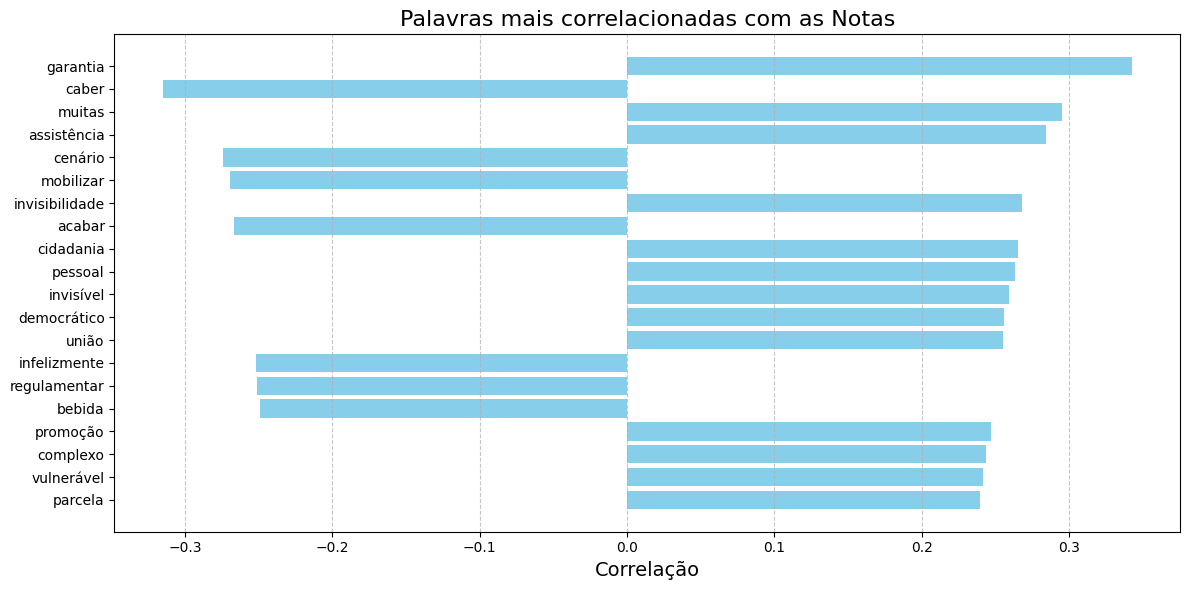

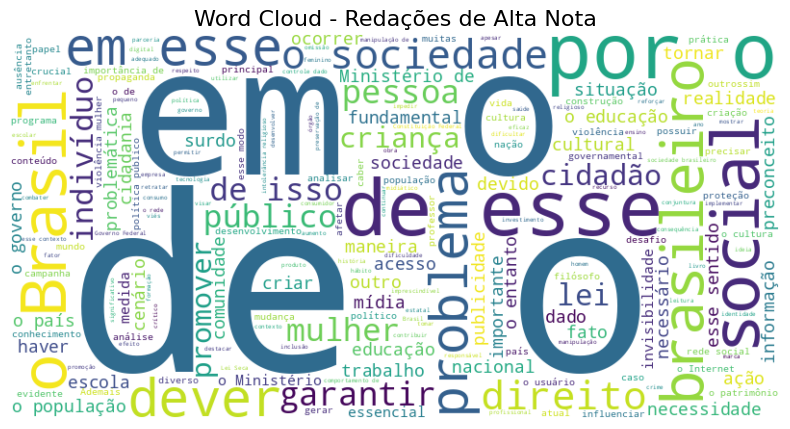

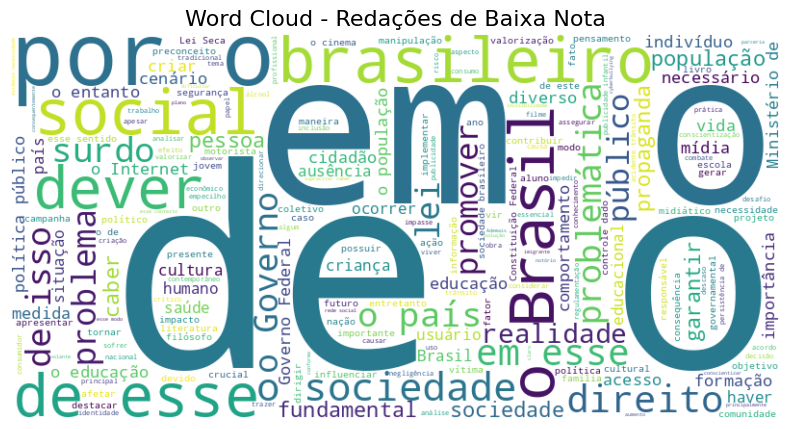

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.stats import spearmanr
from tqdm import tqdm

# Certifique-se de que SpaCy está utilizando a GPU (se disponível)
spacy.require_gpu()
nlp = spacy.load("pt_core_news_sm")

# Lista de stopwords e pontuações
stopwords_pt = set(STOP_WORDS)
punctuation = set(string.punctuation)

# Carregar o arquivo Excel com as redações
file_path = 'Redacoes_comeco.xlsx'  # Substitua pelo caminho correto do arquivo
df = pd.ExcelFile(file_path).parse('Redacoes_comeco')

# Remover linhas nulas e garantir que o texto esteja limpo
df.dropna(subset=['Redação'], inplace=True)

# Pré-processar textos
def preprocess_texts(texts, batch_size=256):
    processed_texts = []
    for docs in tqdm(nlp.pipe(texts, batch_size=batch_size), desc="Pré-processando textos", total=len(texts)):
        tokens = [
            token.lemma_ for token in docs
            if token.is_alpha and token.lemma_ not in stopwords_pt and token.lemma_ not in punctuation
        ]
        processed_texts.append(' '.join(tokens))
    return processed_texts

df['Processed_Text'] = preprocess_texts(df['Redação'])

# Criar TF-IDF para as redações
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.8, min_df=5, sublinear_tf=True)
tfidf_matrix = vectorizer.fit_transform(df['Processed_Text'])

# Calcular correlações entre palavras e notas
feature_names = vectorizer.get_feature_names_out()
correlations = {}
for i, word in enumerate(feature_names):
    correlations[word] = spearmanr(tfidf_matrix[:, i].toarray().flatten(), df['Nota']).correlation

# Ordenar palavras por correlação
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Exibir as palavras mais correlacionadas
print("\nPalavras mais correlacionadas com as notas:")
for word, corr in sorted_correlations[:20]:
    print(f"{word}: {corr:.3f}")

# Visualizar as palavras mais correlacionadas
plt.figure(figsize=(12, 6))
top_words = [word for word, _ in sorted_correlations[:20]]
top_corrs = [corr for _, corr in sorted_correlations[:20]]
plt.barh(top_words, top_corrs, color='skyblue')
plt.xlabel("Correlação", fontsize=14)
plt.title("Palavras mais correlacionadas com as Notas", fontsize=16)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise exploratória: Word Cloud para as redações de alta e baixa nota
def generate_wordcloud(reviews, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(reviews))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Separar redações de alta e baixa nota
high_note_reviews = df[df['Nota'] >= 900]['Processed_Text']
low_note_reviews = df[df['Nota'] < 900]['Processed_Text']

# Gerar Word Cloud para ambas
generate_wordcloud(high_note_reviews, "Word Cloud - Redações de Alta Nota")
generate_wordcloud(low_note_reviews, "Word Cloud - Redações de Baixa Nota")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Correlação das Métricas com as Notas:
               Métrica  Correlação
1            Coerência    0.096811
0               Coesão    0.088329
2  Diversidade Lexical    0.037794
3    Densidade Lexical    0.015815
4   Entidades Nomeadas   -0.056691


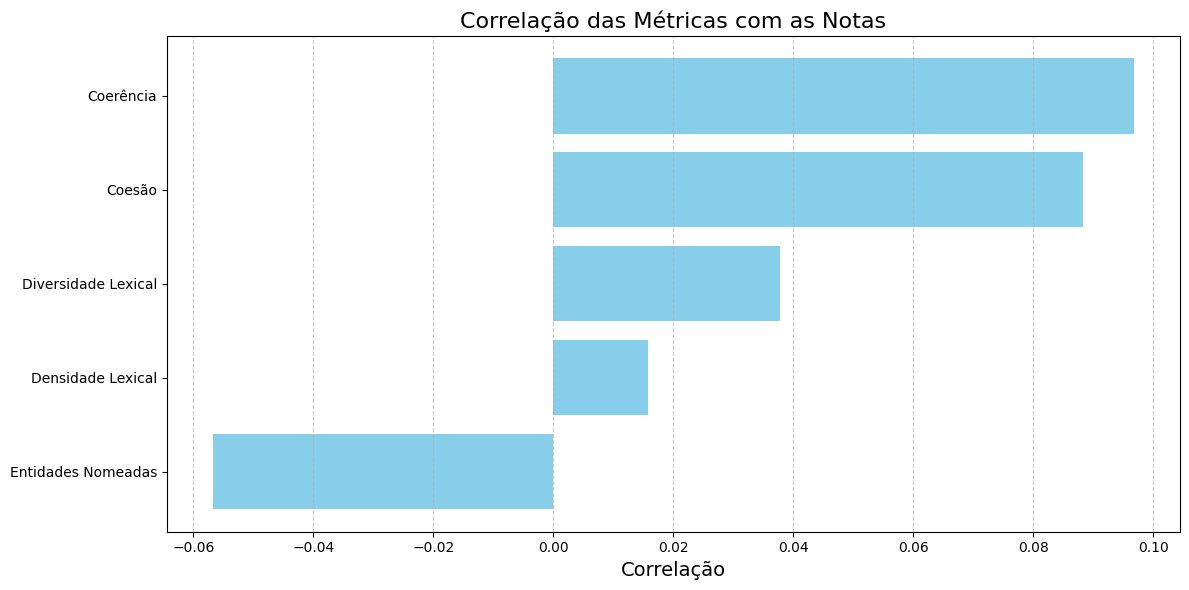


Média das Métricas para Redações de Alta Nota:
Coesão                   3.109375
Coerência                0.410972
Diversidade Lexical      0.557115
Densidade Lexical        0.488929
Entidades Nomeadas       9.593750
Nota                   951.250000
dtype: float64

Média das Métricas para Redações de Baixa Nota:
Coesão                   3.342857
Coerência                0.406163
Diversidade Lexical      0.551342
Densidade Lexical        0.481235
Entidades Nomeadas      11.800000
Nota                   880.000000
dtype: float64


In [22]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

# Configuração do SpaCy e modelo para embeddings
spacy.require_gpu()
nlp = spacy.load("pt_core_news_sm")
sentence_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Carregar o arquivo Excel
file_path = 'Redacoes_comeco.xlsx'  # Substitua pelo caminho correto
df = pd.ExcelFile(file_path).parse('Redacoes_comeco')

# Remover redações vazias
df = df.dropna(subset=['Redação'])

# Função para calcular métricas avançadas
def analyze_text(text):
    doc = nlp(text)
    metrics = {}

    # Coesão: Contagem de conectivos
    connectives = ["portanto", "além disso", "porém", "assim", "contudo", "entretanto"]
    metrics['Coesão'] = sum([text.lower().count(word) for word in connectives])

    # Coerência: Similaridade entre frases consecutivas
    sentences = [sent.text for sent in doc.sents]
    sentence_embeddings = [sentence_model.encode(sent) for sent in sentences]
    if len(sentence_embeddings) > 1:
        metrics['Coerência'] = np.mean(
            [1 - cosine(sentence_embeddings[i], sentence_embeddings[i + 1]) for i in range(len(sentence_embeddings) - 1)]
        )
    else:
        metrics['Coerência'] = 0

    # Complexidade lexical
    words = [token.text.lower() for token in doc if token.is_alpha]
    unique_words = set(words)
    metrics['Diversidade Lexical'] = len(unique_words) / len(words) if words else 0

    # Densidade lexical: Substantivos, verbos e adjetivos
    metrics['Densidade Lexical'] = sum(1 for token in doc if token.pos_ in ['NOUN', 'VERB', 'ADJ']) / len(words) if words else 0

    # Número de entidades nomeadas
    metrics['Entidades Nomeadas'] = len(doc.ents)

    return metrics

# Aplicar análise às redações
metrics_list = df['Redação'].apply(analyze_text)

# Criar um DataFrame com as métricas
metrics_df = pd.DataFrame(metrics_list.tolist())
metrics_df['Nota'] = df['Nota']

# Calcular correlações entre métricas e notas
correlations = {col: spearmanr(metrics_df[col], metrics_df['Nota']).correlation for col in metrics_df.columns if col != 'Nota'}

# Exibir correlações
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Métrica', 'Correlação']).sort_values(by='Correlação', ascending=False)
print("\nCorrelação das Métricas com as Notas:")
print(correlation_df)

# Visualizar as métricas mais correlacionadas
plt.figure(figsize=(12, 6))
plt.barh(correlation_df['Métrica'], correlation_df['Correlação'], color='skyblue')
plt.xlabel("Correlação", fontsize=14)
plt.title("Correlação das Métricas com as Notas", fontsize=16)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise de redações de alta e baixa nota
high_notes = metrics_df[metrics_df['Nota'] >= 900].mean()
low_notes = metrics_df[metrics_df['Nota'] < 900].mean()

print("\nMédia das Métricas para Redações de Alta Nota:")
print(high_notes)

print("\nMédia das Métricas para Redações de Baixa Nota:")
print(low_notes)


Processando redações: 100%|██████████| 99/99 [00:04<00:00, 24.00it/s]



Correlação das Métricas com as Notas:
                  Métrica  Correlação
5  Proporção Substantivos    0.175833
3               Advérbios    0.151170
2               Adjetivos    0.125274
0            Substantivos    0.119837
8     Proporção Advérbios    0.102893
4          Total Palavras    0.074864
7     Proporção Adjetivos    0.073968
1                  Verbos   -0.037644
6        Proporção Verbos   -0.141167


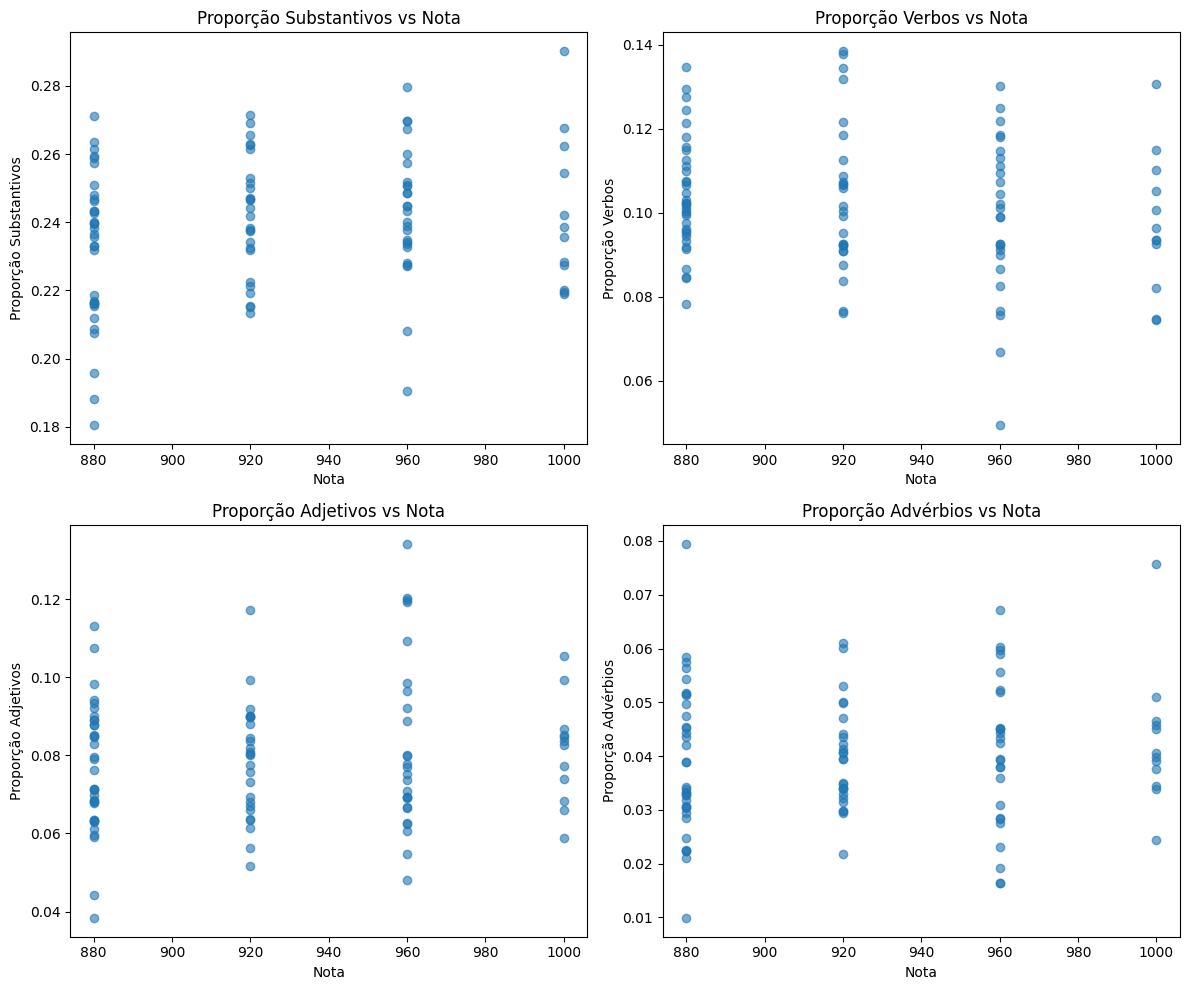


Média das Métricas para Redações de Alta Nota:
Substantivos              112.296875
Verbos                     46.609375
Adjetivos                  37.109375
Advérbios                  19.046875
Total Palavras            462.015625
Proporção Substantivos      0.242471
Proporção Verbos            0.100649
Proporção Adjetivos         0.080547
Proporção Advérbios         0.040598
Nota                      951.250000
dtype: float64

Média das Métricas para Redações de Baixa Nota:
Substantivos              106.885714
Verbos                     48.342857
Adjetivos                  34.971429
Advérbios                  18.085714
Total Palavras            462.485714
Proporção Substantivos      0.232263
Proporção Verbos            0.104168
Proporção Adjetivos         0.076749
Proporção Advérbios         0.038882
Nota                      880.000000
dtype: float64


In [23]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import spearmanr

# Configuração do SpaCy
spacy.require_gpu()
nlp = spacy.load("pt_core_news_sm")

# Carregar o arquivo Excel
file_path = 'Redacoes_comeco.xlsx'  # Substitua pelo caminho correto
df = pd.ExcelFile(file_path).parse('Redacoes_comeco')

# Remover redações vazias
df = df.dropna(subset=['Redação'])

# Função para identificar categorias gramaticais
def analyze_pos(text):
    doc = nlp(text)
    pos_counts = Counter(token.pos_ for token in doc)
    total_words = sum(pos_counts.values())
    return {
        'Substantivos': pos_counts.get('NOUN', 0),
        'Verbos': pos_counts.get('VERB', 0),
        'Adjetivos': pos_counts.get('ADJ', 0),
        'Advérbios': pos_counts.get('ADV', 0),
        'Total Palavras': total_words,
        'Proporção Substantivos': pos_counts.get('NOUN', 0) / total_words if total_words > 0 else 0,
        'Proporção Verbos': pos_counts.get('VERB', 0) / total_words if total_words > 0 else 0,
        'Proporção Adjetivos': pos_counts.get('ADJ', 0) / total_words if total_words > 0 else 0,
        'Proporção Advérbios': pos_counts.get('ADV', 0) / total_words if total_words > 0 else 0,
    }

# Aplicar a análise em todas as redações
tqdm.pandas(desc="Processando redações")
pos_metrics = df['Redação'].progress_apply(analyze_pos)

# Converter resultados em DataFrame
pos_df = pd.DataFrame(pos_metrics.tolist())
pos_df['Nota'] = df['Nota']

# Correlação entre métricas e notas
correlations = {
    col: spearmanr(pos_df[col], pos_df['Nota']).correlation
    for col in pos_df.columns if col != 'Nota'
}

# Exibir as correlações
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Métrica', 'Correlação']).sort_values(by='Correlação', ascending=False)
print("\nCorrelação das Métricas com as Notas:")
print(correlation_df)

# Visualização das proporções
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
categories = ['Proporção Substantivos', 'Proporção Verbos', 'Proporção Adjetivos', 'Proporção Advérbios']
for ax, category in zip(axes.flat, categories):
    ax.scatter(pos_df['Nota'], pos_df[category], alpha=0.6)
    ax.set_title(f"{category} vs Nota")
    ax.set_xlabel("Nota")
    ax.set_ylabel(category)
plt.tight_layout()
plt.show()

# Estatísticas descritivas para alta e baixa nota
high_notes = pos_df[pos_df['Nota'] >= 900].mean()
low_notes = pos_df[pos_df['Nota'] < 900].mean()

print("\nMédia das Métricas para Redações de Alta Nota:")
print(high_notes)

print("\nMédia das Métricas para Redações de Baixa Nota:")
print(low_notes)


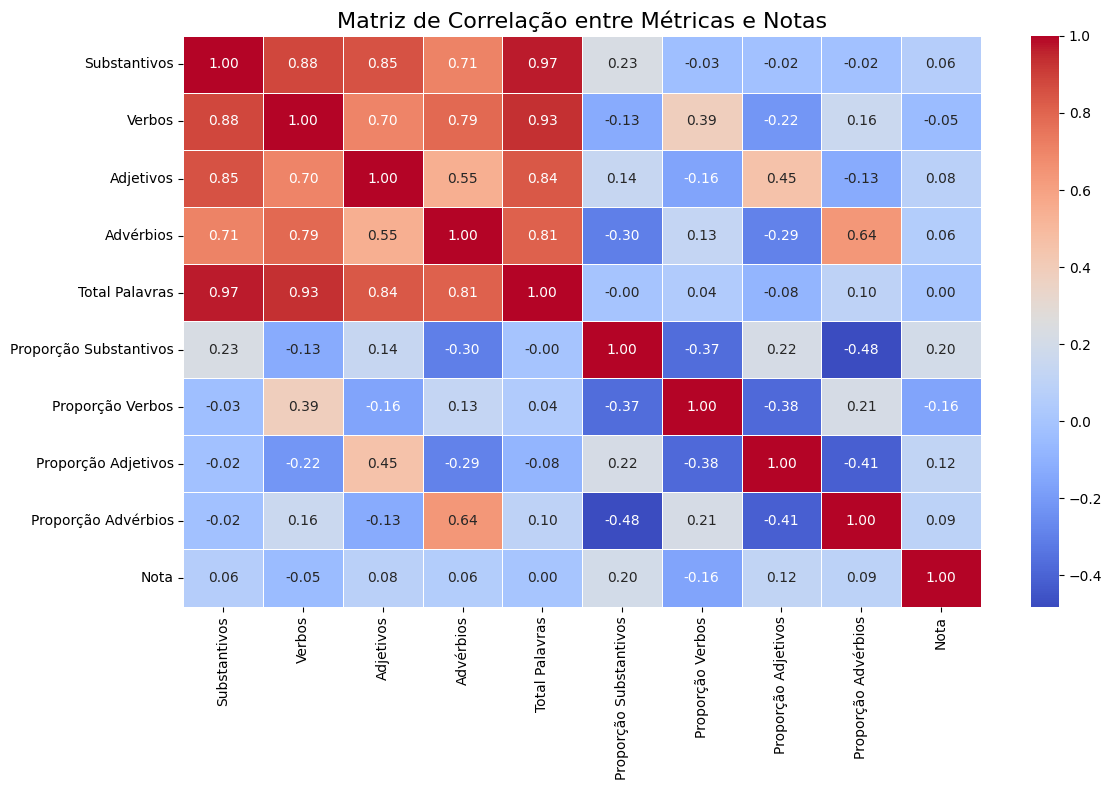

In [24]:
import seaborn as sns

# Criar a matriz de correlação das métricas com as notas
correlation_matrix = pos_df.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Métricas e Notas", fontsize=16)
plt.tight_layout()
plt.show()



Analisando similaridade entre frases: 100%|██████████| 99/99 [00:06<00:00, 15.94it/s]



Correlação das Métricas de Similaridade com as Notas:
               Métrica  Correlação
0   Similaridade Média    0.059966
1  Similaridade Mínima    0.033998
2  Similaridade Máxima   -0.083998


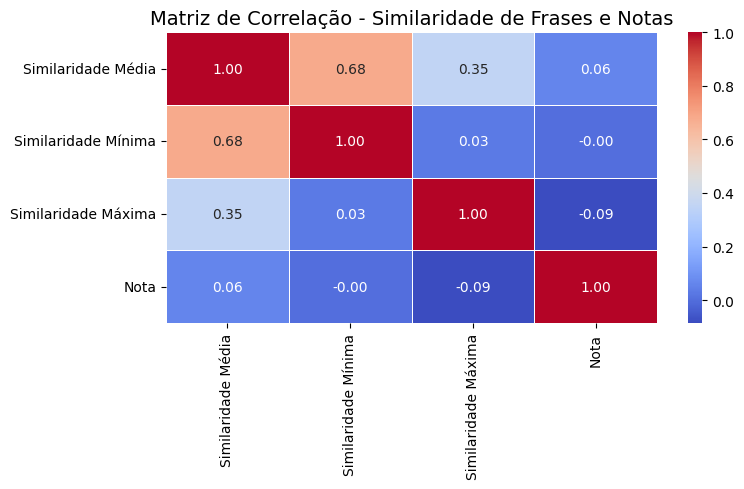

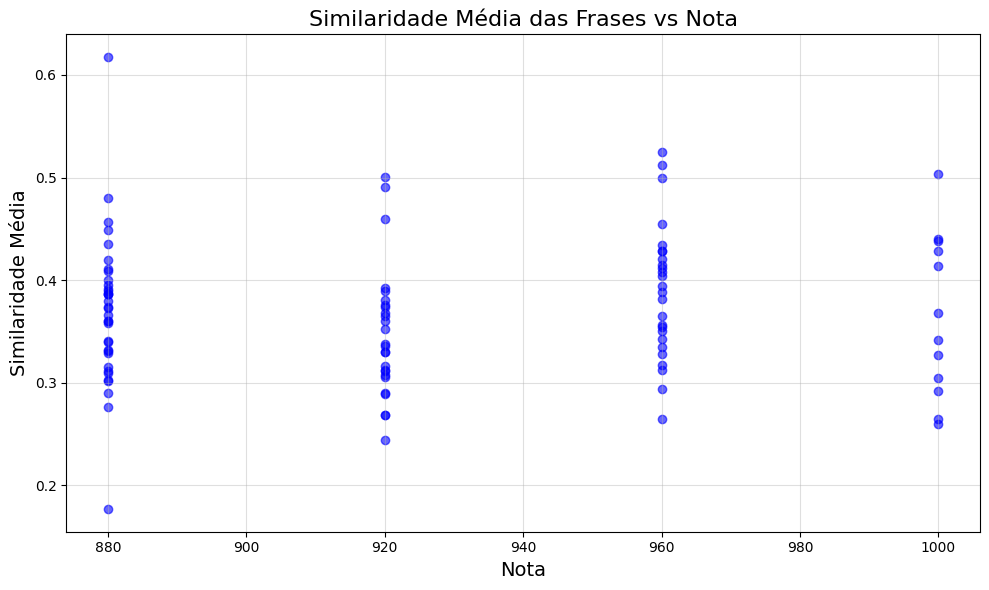

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
import spacy

# Configuração de SpaCy e Sentence-BERT
spacy.require_gpu()
nlp = spacy.load("pt_core_news_sm")
sentence_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# Carregar o arquivo Excel com as redações
file_path = 'Redacoes_comeco.xlsx'  # Substitua pelo caminho correto
df = pd.ExcelFile(file_path).parse('Redacoes_comeco')

# Remover redações vazias
df = df.dropna(subset=['Redação'])

# Função para calcular similaridade entre frases
def analyze_sentence_similarity(text):
    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents if len(sent.text.strip()) > 0]
    if len(sentences) < 2:  # Precisa de pelo menos 2 frases para calcular similaridade
        return {
            'Similaridade Média': 0,
            'Similaridade Mínima': 0,
            'Similaridade Máxima': 0,
        }

    # Gerar embeddings para as frases
    embeddings = sentence_model.encode(sentences)

    # Calcular similaridades de cosseno entre todas as combinações de frases
    similarities = [
        1 - cosine(embeddings[i], embeddings[j])
        for i in range(len(embeddings)) for j in range(i + 1, len(embeddings))
    ]

    return {
        'Similaridade Média': np.mean(similarities),
        'Similaridade Mínima': np.min(similarities),
        'Similaridade Máxima': np.max(similarities),
    }

# Aplicar a análise de similaridade em todas as redações
tqdm.pandas(desc="Analisando similaridade entre frases")
similarity_metrics = df['Redação'].progress_apply(analyze_sentence_similarity)

# Converter resultados em DataFrame
similarity_df = pd.DataFrame(similarity_metrics.tolist())
similarity_df['Nota'] = df['Nota']

# Correlação entre métricas de similaridade e notas
correlations = {
    col: spearmanr(similarity_df[col], similarity_df['Nota']).correlation
    for col in similarity_df.columns if col != 'Nota'
}

# Exibir as correlações
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Métrica', 'Correlação']).sort_values(by='Correlação', ascending=False)
print("\nCorrelação das Métricas de Similaridade com as Notas:")
print(correlation_df)

# Visualizar correlações com heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(similarity_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Similaridade de Frases e Notas", fontsize=14)
plt.tight_layout()
plt.show()

# Visualização da relação entre similaridade média e nota
plt.figure(figsize=(10, 6))
plt.scatter(similarity_df['Nota'], similarity_df['Similaridade Média'], alpha=0.6, color='blue')
plt.title("Similaridade Média das Frases vs Nota", fontsize=16)
plt.xlabel("Nota", fontsize=14)
plt.ylabel("Similaridade Média", fontsize=14)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()
